
# Оцінка та вдосконалення моделі


<h2>Мета</h2>

Ознайомитись з методами оцінки та вдосконалення регресійних моделей. Після завершення цієї лабораторної роботи ви зможете:

* Розділяти дані на навчальну та тестову вибірки
* Використовувати перехресну перевірку для оцінки якості моделі
* Обирати оптимальну складність моделі для уникнення перенавчання
* Вдосконалювати моделі прогнозування за допомогою підбору параметрів


<div class="alert alert-danger alertdanger" style="margin-top: 20px">

# <h1 id="task">Завдання, що оцінюються </h1>

</div>


1. Скачайте дані із файлу <a href="https://drive.google.com/file/d/1wSj5SKRPKOjNPP2cyqaNpxRCinKEmJkO/view?usp=drive_link" target="_blank">'clean_data2.csv'</a> (Data2.csv з виправленими помилками та заповненими пропусками). Запишіть дані у два датафрейми: предиктори (x_data) та відгуки (y_data). Випадковим чином розділіть дані на навчальні та тестові (використайте 20% загального набору в якості тестових даних).
2. Побудуйте модель лінійної одномірної регресії для одного з предикторів, використовуючи навчальні дані. Знайдіть R^2 на навчальних та тестових даних. Чому вони різні і на який з них треба орієнтуватись при виборі моделі?
3. Побудуйте кілька поліноміальних моделей різних ступенів для того ж предиктора. Знайдіть R^2 цих моделей на тестових даних. Яка з моделей краща? При якому ступені полінома спостерігається перенавчання?
4. Побудуйте модель гребеневої регресії для двох найкращих предикторів. Параметр alpha повинен бути встановлений на 10. Обчисліть R^2.
5. Виконайте пошук по сітці для параметра alpha та параметра нормалізації, а потім побудуйте модель, використавши найкращі значення параметрів.

<a name="task1"></a>
<div class="alert alert-danger alertdanger" style="margin-top: 20px">

## <h2 id="task1">Завдання  #1: </h2>

<p>Запишіть дані у два датафрейми: предиктори (x_data) та відгуки (y_data). Випадковим чином розділіть дані на навчальні та тестові (використайте 20% загального набору в якості тестових даних).</p>
</div>


Зчитую дані з файлу у датафрейм


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

path = '../data/clean_data2.csv'

In [3]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
df = pd.read_csv(path)
df

,Country Name,Region,GDP per capita,Population,CO2 emission,Area,Population density
0,Afghanistan,South Asia,561.778746,34656032.0,9809.225000,652860,53.083405
1,Albania,Europe & Central Asia,4124.982390,2876101.0,5716.853000,28750,100.038296
2,Algeria,Middle East & North Africa,3916.881571,40606052.0,145400.217000,2381740,17.048902
3,American Samoa,East Asia & Pacific,11834.745230,55599.0,165114.116337,200,277.995000
4,Andorra,Europe & Central Asia,36988.622030,77281.0,462.042000,470,164.427660
...,...,...,...,...,...,...,...
212,Virgin Islands (U.S.),Latin America & Caribbean,13445.593416,102951.0,165114.116337,350,294.145714
213,West Bank and Gaza,Middle East & North Africa,2943.404534,4551566.0,165114.116337,6020,756.074086
214,"Yemen, Rep.",Middle East & North Africa,990.334774,27584213.0,22698.730000,527970,52.245796
215,Zambia,Sub-Saharan Africa,1269.573537,16591390.0,4503.076000,752610,22.045136


Буду використовувати тільки числові дані


In [4]:

df=df._get_numeric_data()
df.head()

,GDP per capita,Population,CO2 emission,Area,Population density
0,561.778746,34656032.0,9809.225000,652860,53.083405
1,4124.982390,2876101.0,5716.853000,28750,100.038296
2,3916.881571,40606052.0,145400.217000,2381740,17.048902
3,11834.745230,55599.0,165114.116337,200,277.995000
4,36988.622030,77281.0,462.042000,470,164.427660


Записую дані у два датафрейми: предиктори (x_data) та відгуки (y_data).


In [5]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
y_data = df['CO2 emission']
x_data = df.drop('CO2 emission', axis=1)

Випадковим чином розділяю дані на навчальні та тестові (40% загального набору в якості тестових даних).


In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.40, random_state=0)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 87
number of training samples: 130


<a name="task2"></a>
<div class="alert alert-danger alertdanger" style="margin-top: 20px">

## <h2 id="task2">Завдання  #2: </h2>

<p>Побудуйте модель лінійної одномірної регресії для одного з предикторів, використовуючи навчальні дані. Знайдіть R^2 на навчальних та тестових даних. Чому вони різні і на який з них треба орієнтуватись при виборі моделі?</p>
</div>


<p>З попередніх робіт знаю, що хорошими показниками для 'CO2 emission' можуть бути:</p>
<ul>
    <li>ознака 1 -> Population</li>
    <li>ознака 2 -> Area</li>
</ul>
При цьому одномірна модель для ознаки 1 була кращою. Тому будуватиму моделі, використовуючи саме цю ознаку як предиктор.

<p>Створюю об’єкт лінійної регресії та навчаю модель</p>


In [7]:
from sklearn.linear_model import LinearRegression

In [26]:
lre=LinearRegression()
lre.fit(x_test[['Population']], y_test)

LinearRegression()

Обчислюю R^2  на навчальних та тестових даних:


In [27]:
print("Testing data r^2: ", lre.score(x_test[['Population']], y_test))
print("Training data r^2: ", lre.score(x_train[['Population']], y_train))

Testing data r^2:  0.32544512272813486
Training data r^2:  0.41870274450127454


<p>Вони різні бо недостатньо даних  і відбулося перенавчання для тестових даних  </p>
<p>При виборі моделі треба орієнтуватись на її здатність до узагальнення(модель яка стабільна на всіх даних) на нові дані</p>


<a name="task3"></a>
<div class="alert alert-danger alertdanger" style="margin-top: 20px">

## <h2 id="task3">Завдання  #3: </h2>

<p>Побудуйте кілька поліноміальних моделей різних ступенів для того ж предиктора. Знайдіть R^2 цих моделей на тестових даних. Яка з моделей краща? При якому ступені полінома спостерігається перенавчання?</p>
</div>


Будую поліноміальну модель 2 ступеня, на тестових даних обчислюю R^2


In [10]:
from sklearn.preprocessing import PolynomialFeatures

In [11]:
from sklearn.preprocessing import PolynomialFeatures
# Будую поліноміальну модель
orders = [1, 2, 3, 4, 5, 6]
for i in orders:

    pr_2 = PolynomialFeatures(degree=i)
    x_train_pr = pr_2.fit_transform(x_train[['Population']])
    x_test_pr = pr_2.fit_transform(x_test[['Population']])

    poly = LinearRegression()
    poly.fit(x_test_pr, y_test)
    # На тестових даних обчислюю R^2
    r = poly.score(x_test_pr, y_test)
    print(f"Order: {i}, r^2 = {r}")

Order: 1, r^2 = 0.325445122728135
Order: 2, r^2 = 0.3458531136543802
Order: 3, r^2 = 0.3184955516021668
Order: 4, r^2 = 0.25159910084594217
Order: 5, r^2 = 0.20401283427980954
Order: 6, r^2 = 0.17631793576363763


Будую поліноміальну модель _ ступеня, на тестових даних обчислюю R^2


Будую поліноміальну модель _ ступеня, на тестових даних обчислюю R^2


In [12]:
# from sklearn.preprocessing import PolynomialFeatures
# # Будую поліноміальну модель
# orders = [1, 2, 3, 4, 5, 6]
# for i in orders:

#     pr_2 = PolynomialFeatures(degree=i)
#     x_train_pr = pr_2.fit_transform(x_train[['Population']])
#     x_test_pr = pr_2.fit_transform(x_test[['Population']])

#     poly = LinearRegression()
#     poly.fit(x_test_pr, y_test)
#     # На тестових даних обчислюю R^2
#     r = poly.score(x_test_pr, y_test)
#     print(f"Order: {i}, r^2 = {r}")

Найкращою є модель 2 ступеня, бо для 3 ступеня вже спостерігається перенавчання.


<a name="task4"></a>
<div class="alert alert-danger alertdanger" style="margin-top: 20px">

## <h2 id="task4">Завдання  #4: </h2>

<p>Побудуйте модель гребеневої регресії для двох найкращих предикторів. Параметр alpha повинен бути встановлений на 10. Обчисліть R^2.</p>
</div>


Будую модель гребеневої регресії, обчислюю R^2


In [13]:
# Виконую поліноміальне перетворення 2 ступеня для двох обраних ознак
pr=PolynomialFeatures(degree=2)

x_train_pr=pr.fit_transform(x_train[['Area', 'Population']])
x_test_pr=pr.fit_transform(x_test[['Area', 'Population']])


In [14]:
from sklearn.linear_model import Ridge

# Створюю об’єкт гребеневої регресії, встановивши параметр alpha=10


RigeModel=Ridge(alpha=10)
RigeModel.fit(x_train_pr, y_train)

test_score = RigeModel.score(x_test_pr, y_test)
train_score = RigeModel.score(x_train_pr, y_train)
print("Test r^2 = " +  str(test_score) + " , train r^2 = " + str(train_score))

Test r^2 = -2.3279458664161425 , train r^2 = 0.9754397607874128


c:\Users\slden\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=1.51168e-36): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


<a name="task5"></a>
<div class="alert alert-danger alertdanger" style="margin-top: 20px">

## <h2 id="task5">Завдання  #5: </h2>

<p>Виконайте пошук по сітці для параметра alpha та параметра нормалізації, а потім побудуйте модель, використавши найкращі значення параметрів.</p>
</div>


Створюю словник значень параметрів:


In [15]:
from sklearn.model_selection import GridSearchCV

In [16]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 1000000]}]

Створюю об’єкт сітки пошуку параметра гребеневої регресії:


In [17]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання

Grid2 = GridSearchCV(Ridge(), parameters1, cv=2)

Підбираю модель:


In [18]:
Grid2.fit(x_data[['Population', 'Area']], y_data)

GridSearchCV(cv=2, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    1000000]}])

Отримую модель з найкращими параметрами:


In [19]:
BestRR=Grid2.best_estimator_
BestRR

Ridge(alpha=0.001)

Тестую модель на тестових даних (обчислюю R^2):


In [20]:
BestRR.score(x_test[['Population', 'Area']], y_test)

-1.064704425074456

<a name="task6"></a>
<div class="alert alert-danger alertdanger" style="margin-top: 20px">

## <h2 id="task6"> Додаткове завдання: </h2>

<p>Побудуйте візуалізації для оцінки якості моделей (лінійної, кращої з поліноміальних та кращої з гребеневих)</p>
</div>


Використаю метод "predict", щоб спрогнозувати результати, а потім скористаюсь функцією "DistributionPlot", щоб відобразити розподіл прогнозованих результатів для тестових даних порівняно з фактичними для тестових даних.


In [55]:
def DistributionPlot(BlueFunction, RedFunction  = y_test,  RedName = "Actual Values (Test)", BlueName = "Predicted Values (Test)", Title = 'default'):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title('Distribution  Plot of  Predicted Value Using Testing Data vs Testing Data Distribution')
    plt.xlabel('CO2 emission')
    plt.ylabel('Factors')

    plt.show()
    plt.close()

C:\Users\slden\AppData\Local\Temp\ipykernel_7492\2572327885.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
C:\Users\slden\AppData\Local\Temp\ipykernel_7492\2572327885.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax2 = sns.

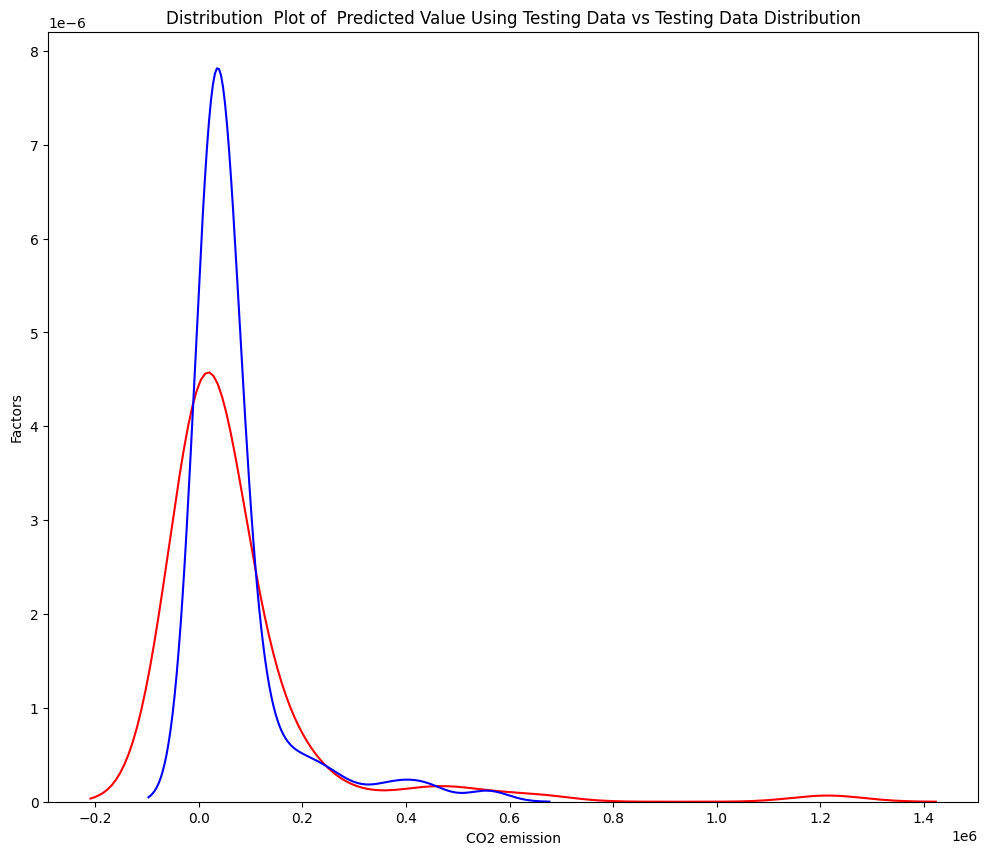

C:\Users\slden\AppData\Local\Temp\ipykernel_7492\2572327885.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
C:\Users\slden\AppData\Local\Temp\ipykernel_7492\2572327885.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax2 = sns.

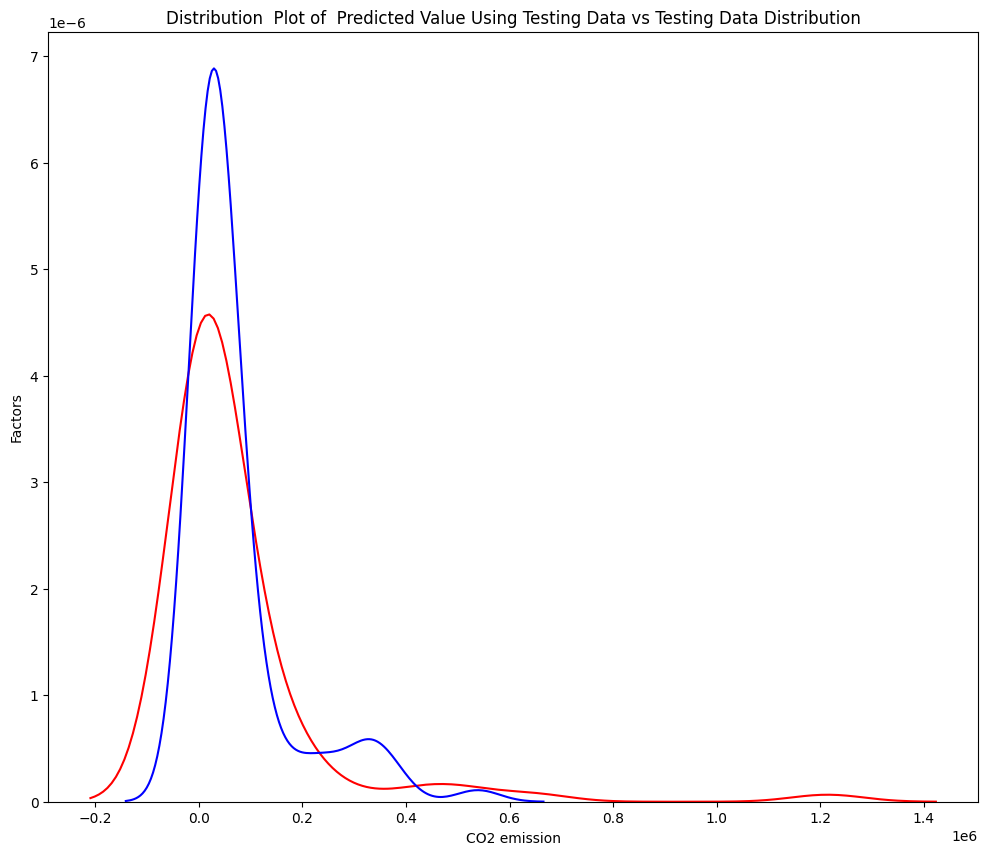

C:\Users\slden\AppData\Local\Temp\ipykernel_7492\2572327885.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
C:\Users\slden\AppData\Local\Temp\ipykernel_7492\2572327885.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax2 = sns.

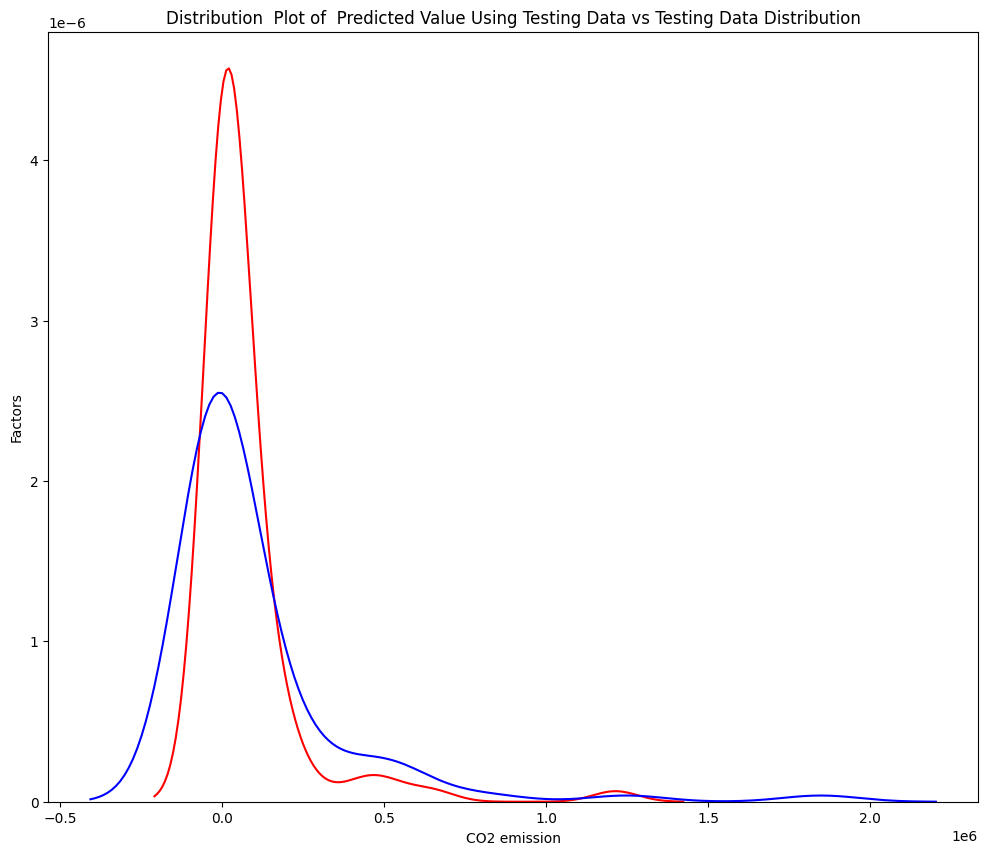

In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures


# liner
lre=LinearRegression()
lre.fit(x_test[['Population']], y_test)
yhat = lre.predict(x_test[['Population']])

# polinomial
pr_2 = PolynomialFeatures(degree=2)
x_train_pr = pr_2.fit_transform(x_train[['Population', 'Area']])
x_test_pr = pr_2.fit_transform(x_test[['Population', 'Area']])

lr = LinearRegression()
lr.fit(x_test_pr, y_test)
pre = lr.predict(x_test_pr)

# grebineva
Grid2 = GridSearchCV(Ridge(), [{'alpha' : [0.001]}], cv=2)
Grid2.fit(x_data[['Population', 'Area']], y_data)
BestRR = Grid2.best_estimator_
predictions = BestRR.predict(x_test[['Population', 'Area']])



DistributionPlot(yhat)
DistributionPlot(pre)
DistributionPlot(predictions)


<h2>Виконав студент групи ІП-24<br>В'ячеслав Денисенко</h2>
